# DEVELOPMENT C3 WEEK 1

Explanataion of the task...

This task has many ways to solve it. First, we have to decide which local descriptor we are will use: SIFT, Dense SIFT, ORB or AKAZE. Each one will be tested first with a standard configuration and see which are the results.

In [1]:
import os
import json
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import run_experiment

In [2]:
# Load experiments from JSON
config_path = "configs/local_descriptors.json"

if not os.path.exists(config_path):
    raise FileNotFoundError(f"Please create the file {config_path} first!")

with open(config_path, "r") as f:
    experiments_list = json.load(f)

results_data = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Test Accuracy": acc,
        "Time (s)": duration
    })

print("\nAll experiments finished.")

Loaded 3 experiments from configs/local_descriptors.json

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N500\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [03:23<00:00, 42.67it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [02:22<00:00, 61.07it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:15<00:00, 548.00it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2474 (+/- 0.0145)
Accuracy on Phase [Train]: 0.2977
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N500\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:41<00:00, 52.48it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:44<00:00, 49.35it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2850

Running: ORB (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\ORB_keypoints_N500\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:06<00:00, 129.90it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [02:23<00:00, 60.79it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1584.01it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1676 (+/- 0.0096)
Accuracy on Phase [Train]: 0.2070
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\ORB_keypoints_N500\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:13<00:00, 157.86it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:40<00:00, 53.90it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1755

Running: AKAZE (Default)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [02:47<00:00, 51.94it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:19<00:00, 437.01it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1824 (+/- 0.0038)
Accuracy on Phase [Train]: 0.2236
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:39<00:00, 55.81it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1832

All experiments finished.


In [ ]:
# 1. Process the raw data to unpack the tuple
cleaned_results = []

for item in results_data:
    # currently item['Test Accuracy'] contains (train_acc, test_acc)
    train_acc, test_acc = item['Test Accuracy'] 
    
    cleaned_results.append({
        "Descriptor": item['Descriptor'],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": item['Time (s)']
    })

# 2. Create DataFrame
df = pd.DataFrame(cleaned_results)

# save to csv
df.to_csv("results/local_descriptors.csv", index=False)

# Display cleaned table
print("Processed Results:")
display(df)

Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=500),0.297701,0.285000,480.118698
1,ORB (N=500),0.207011,0.175455,302.207300
2,AKAZE (Default),0.223563,0.183182,257.915071


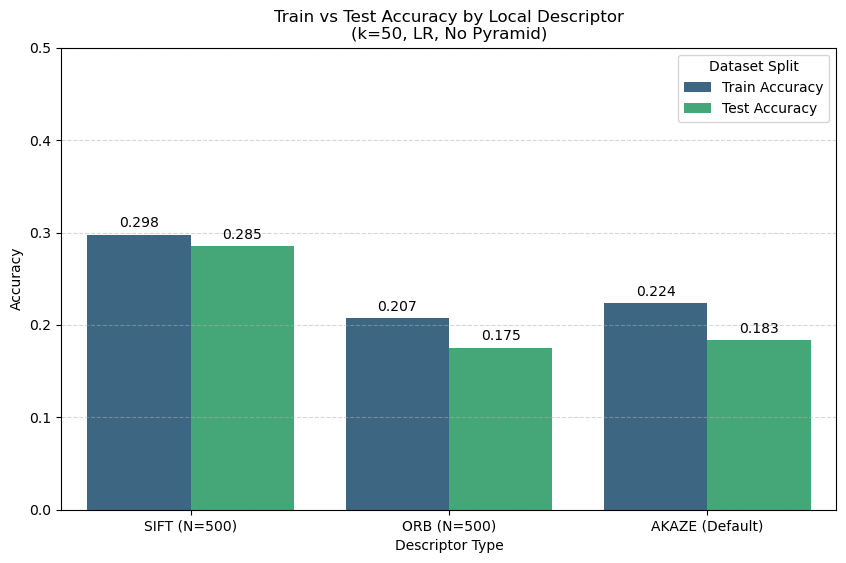

In [ ]:
# 3. Prepare data for Seaborn (Melt to long format)

#load data
df = pd.read_csv("results/local_descriptors.csv")


df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Grouped Bar Plot
ax = sns.barplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis"
)

# Add numeric labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title("Train vs Test Accuracy by Local Descriptor\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Adjusted limit since values are around 0.2 - 0.3
plt.ylabel("Accuracy")
plt.xlabel("Descriptor Type")
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Nfeatures of sift

In [2]:
# Load experiments from JSON
config_path = "configs/sift_nfeatures.json"

if not os.path.exists(config_path):
    raise FileNotFoundError(f"Please create the file {config_path} first!")

with open(config_path, "r") as f:
    experiments_list = json.load(f)

results_sift_nfeatures = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_sift_nfeatures.append({
        "Descriptor": run_name,
        "Test Accuracy": acc,
        "Time (s)": duration
    })

print("\nAll experiments finished.")

Loaded 6 experiments from configs/sift_nfeatures.json

Running: SIFT (N=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 10000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:00<00:00, 9688.48it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1909.16it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2117 (+/- 0.0148)
Accuracy on Phase [Train]: 0.2533
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:00<00:00, 2253.99it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2450

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 10000...


Fitting Codebook:  84%|████████▎ | 7281/8700 [01:53<00:22, 64.01it/s] 


KeyboardInterrupt: 

In [ ]:
# 1. Process the raw data to unpack the tuple
cleaned_results = []

for item in results_sift_nfeatures:
    # currently item['Test Accuracy'] contains (train_acc, test_acc)
    train_acc, test_acc = item['Test Accuracy'] 
    
    cleaned_results.append({
        "Descriptor": item['Descriptor'],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": item['Time (s)']
    })

# 2. Create DataFrame
df = pd.DataFrame(cleaned_results)

# save to csv
df.to_csv("results/sift_nfeatures.csv", index=False)

# Display cleaned table
print("Processed Results:")
display(df)

In [ ]:
# 3. Prepare data for Seaborn (Melt to long format)

# load data
df = pd.read_csv("results/sift_nfeatures.csv")

# Optional: Ensure the column is numeric so the x-axis is scaled correctly
# (Uncomment the line below if your CSV saves them as strings)
# df["Descriptor"] = pd.to_numeric(df["Descriptor"])

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Line Plot
# - marker='o' adds dots at each data point
# - data is the melted dataframe
ax = sns.lineplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis",
    marker="o" 
)

# Labeling values on a line chart (Optional)
# This loop adds the text label next to each point
for x, y, val in zip(df_melted["Descriptor"], df_melted["Accuracy"], df_melted["Accuracy"]):
    plt.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.title("Train vs Test Accuracy by Number of Features\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Keep your limits or adjust as needed
plt.ylabel("Accuracy")
plt.xlabel("Number of Features (nfeatures)")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()